In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import stats
import math as m
from astropy.cosmology import FlatLambdaCDM

In [2]:
def log_luminosity_h_units(z, m):
    M = m - 5.*np.log10(cosmo.luminosity_distance(z).value) - 25. - 5.*np.log10(cosmo.H0.value/100.) #units of h
    L = -0.4*(M - Msun_i)
    return L

In [3]:
def construct_input_array(z, app_mag_limit):
    input_array = np.zeros((len(z), 3))
    input_array[:,0] = z
    input_array[:,1] = 10.0**log_luminosity_h_units(z, app_mag_limit)
    input_array[:,2] = 10.0**(-0.4*(-26.5 - 5.*np.log10(cosmo.H0.value/100.)- Msun_i))
    input_array[0,0] = 0.0
    return input_array

In [4]:
cosmo = FlatLambdaCDM(Om0=0.265, H0=71.0)
Msun_i = 4.52

In [5]:
esample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/e_sample_for_Nz_imag_Mrest_included.npy')
nsample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/n_sample_for_Nz_imag_Mrest_included.npy')

In [6]:
sz_e = esample[:,0]
pz_e = esample[:,1]
imag_e = esample[:,2]
Mrest_e = esample[:,3]

In [7]:
sz_n = nsample[:,0]
pz_n = nsample[:,1]
imag_n = nsample[:,2]
Mrest_n = nsample[:,3]

In [8]:
mgold = 25.3
z = np.linspace(10.0**(-12.0),3.0,101)
L_min = log_luminosity_h_units(z, mgold)
L_max = -0.4*(-26.5 - 5.*np.log10(cosmo.H0.value/100.)- Msun_i)

Text(0, 0.5, 'log_10 luminsoity')

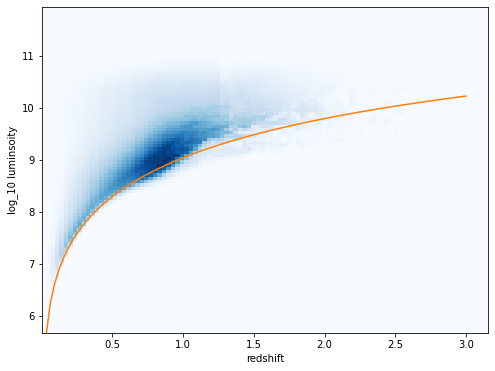

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist2d(sz_e, -0.4*(Mrest_e - 5.*np.log10(cosmo.H0.value/100.)- Msun_i), bins=(100, 100), cmap=plt.cm.Blues)#, norm=LogNorm())
ax.plot(z, L_min, 'C1')
ax.axhline(L_max)
ax.set_xlabel('redshift')
ax.set_ylabel('log_10 luminsoity')

In [14]:
mfaint= 26.5
L_minf = log_luminosity_h_units(z, mfaint)
L_maxf = -0.4*(-26.5 - 5.*np.log10(cosmo.H0.value/100.)- Msun_i)
print(L_maxf)

12.11051669743815


Text(0, 0.5, 'log_10 luminosity')

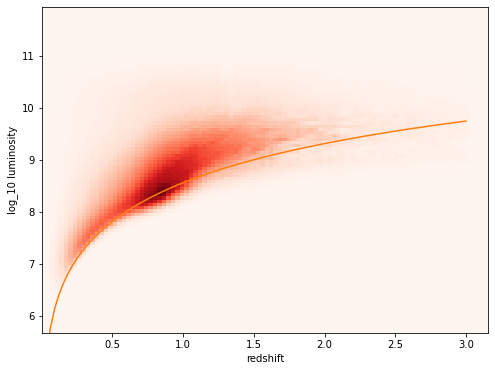

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist2d(sz_n, -0.4*(Mrest_n - 5.*np.log10(cosmo.H0.value/100.)- Msun_i), bins=(100, 100), cmap=plt.cm.Reds) #, norm=LogNorm())
ax.plot(z, L_minf, 'C1')
ax.axhline(L_maxf)
ax.set_xlabel('redshift')
ax.set_ylabel('log_10 luminosity')

In [10]:
e_sample_L_for_hod = construct_input_array(z, 25.3)
print(np.array_equal(np.log10(e_sample_L_for_hod[:,1]), L_min))
print(np.log10(e_sample_L_for_hod[:,2])-L_max)

True
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [29]:
n_sample_L_for_hod = construct_input_array(z, 26.5)
print(np.array_equal(np.log10(n_sample_L_for_hod[:,1]), L_minf))
print(np.log10(n_sample_L_for_hod[:,2])-L_maxf)

True
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [11]:
np.savetxt('e_sample_L_for_hod.txt', e_sample_L_for_hod)
#np.savetxt('n_sample_L_for_hod.txt', n_sample_L_for_hod)

In [32]:
print(np.array_equal(e_sample_L_for_hod, np.loadtxt('e_sample_L_for_hod.txt')))
print(np.array_equal(n_sample_L_for_hod, np.loadtxt('n_sample_L_for_hod.txt')))

True
True
